<a href="https://colab.research.google.com/github/typjohnson/ICA-CLASSIFICATION/blob/main/TPJ_ICA_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## 2. Load the titanic dataset from seaborn

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [5]:
titanic.shape

(891, 15)

Question 2: Are there any missing values?

In [6]:
titanic.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

<Axes: xlabel='class', ylabel='count'>

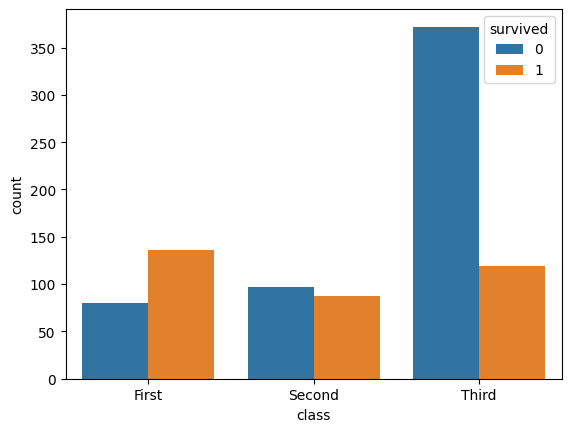

In [7]:
# creating a graph that shows survival rate based on the class
sns.countplot(x='class', hue='survived', data=titanic)

<Axes: xlabel='sex', ylabel='count'>

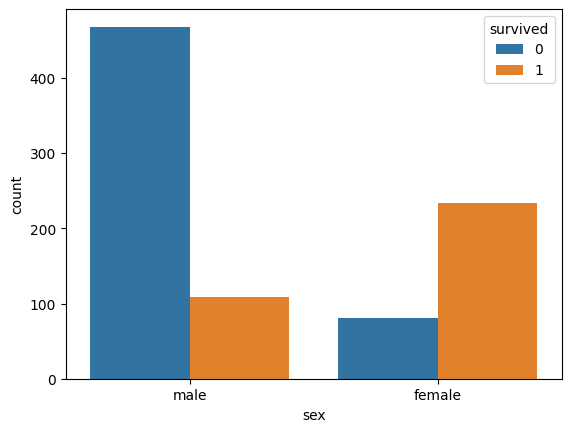

In [8]:
sns.countplot(x='sex', hue='survived', data=titanic)

<Axes: xlabel='age', ylabel='Count'>

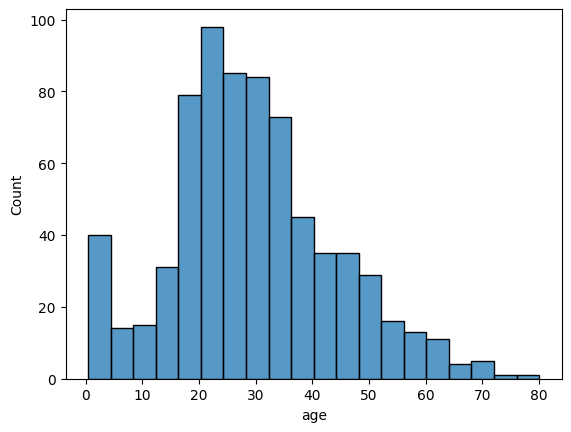

In [10]:
sns.histplot(titanic['age'])

<Axes: xlabel='fare', ylabel='Count'>

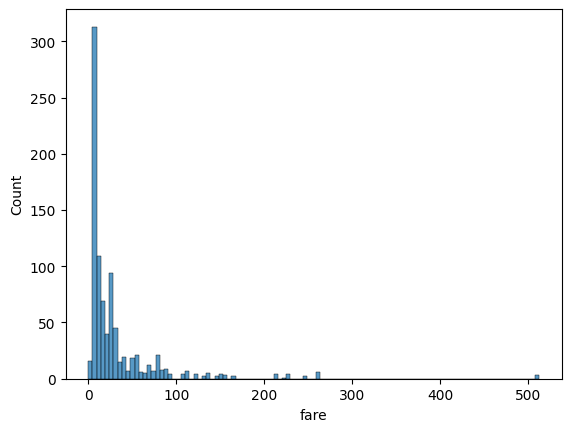

In [11]:
sns.histplot(titanic['fare'])

In [12]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']




### Split the data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [21]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

#pipeline should impute missing values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Training data with multiple models

In [39]:
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    #print training vs. test accuracy
    print("Training accuracy:", pipeline.score(X_train, y_train))
    print("Test accuracy:", pipeline.score(X_test, y_test))





Model: K-Nearest Neighbors
Accuracy: 0.7877094972067039
Training accuracy: 0.8764044943820225
Test accuracy: 0.7877094972067039

Model: Logistic Regression
Accuracy: 0.7988826815642458
Training accuracy: 0.800561797752809
Test accuracy: 0.7988826815642458

Model: Decision Tree
Accuracy: 0.7541899441340782
Training accuracy: 0.9789325842696629
Test accuracy: 0.7541899441340782

Model: Random Forest
Accuracy: 0.7877094972067039
Training accuracy: 0.9789325842696629
Test accuracy: 0.7877094972067039

Model: Support Vector Machine
Accuracy: 0.8044692737430168
Training accuracy: 0.8342696629213483
Test accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.8044692737430168
Training accuracy: 0.9719101123595506
Test accuracy: 0.8044692737430168

Model: Gradient Boosting
Accuracy: 0.8268156424581006
Training accuracy: 0.9030898876404494
Test accuracy: 0.8268156424581006


#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
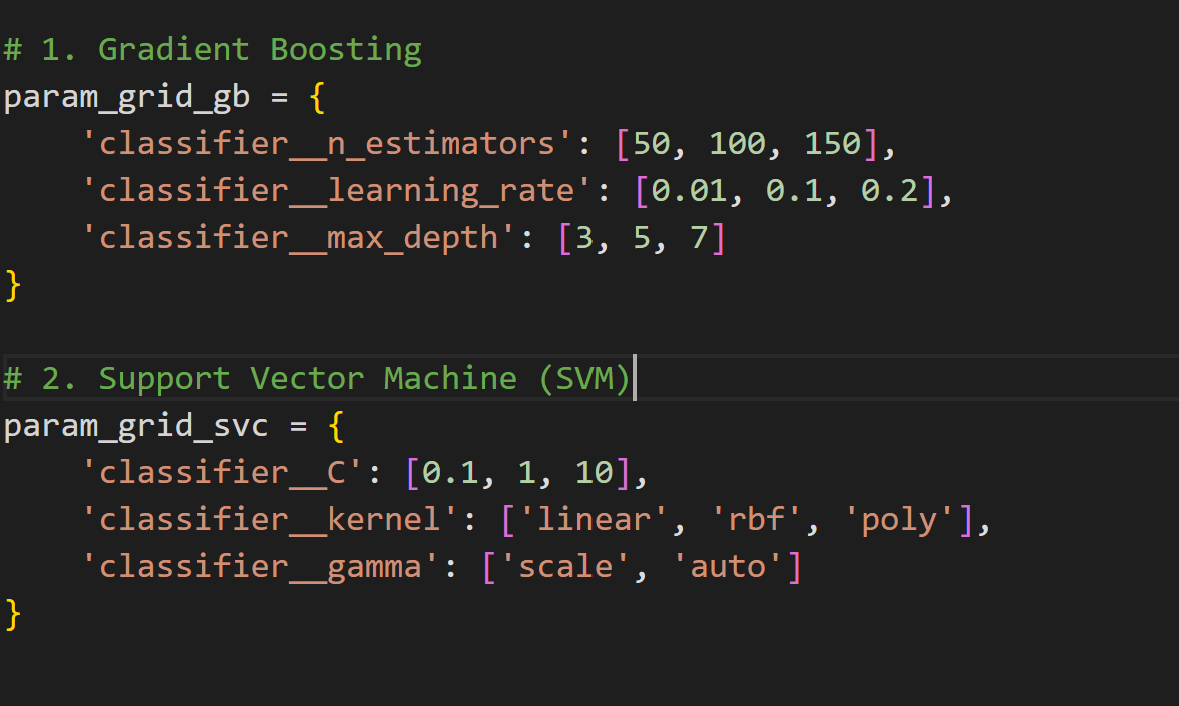

In [35]:
# 1. Gradient Boosting
param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1.0],
    'classifier__max_depth': [3, 5, 7],
}
# 2. Support Vector Machine (SVC)
param_grid_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto'],
}


## List of models and their corresponding parameter grids
Example
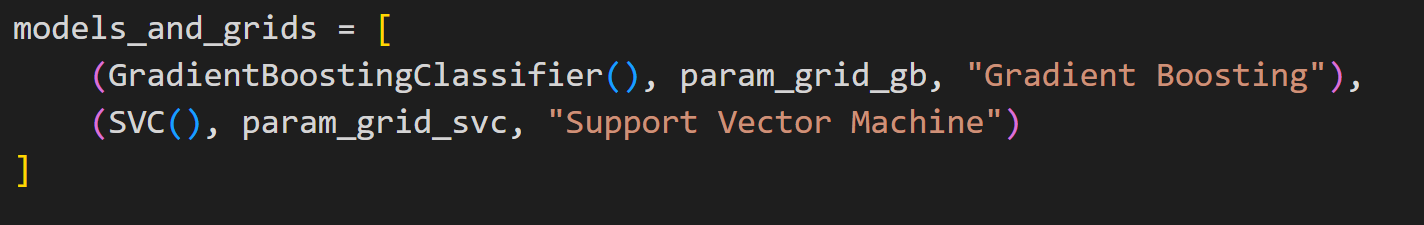

In [37]:
#model and parameter grid for gradient boosting and support vector
models_and_grids = [
    (GradientBoostingClassifier(), param_grid_gb, 'Gradient Boosting'),
    (SVC(), param_grid_svc, 'Support Vector Machine')
]

In [38]:
# Loop through each model and perform GridSearchCV
for model, param_grid, model_name in models_and_grids:
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")


Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best cross-validation accuracy for Gradient Boosting: 0.8314

Best parameters for Support Vector Machine: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best cross-validation accuracy for Support Vector Machine: 0.8315


## 7.Reflection and Analysis
Which model performed the best without tuning?

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?

3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?

5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
Based on your findings, which model would you select for deployment, and why?

6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.

Based on the initial accuracy scores, the model that had the highest accuracy before hyperparameter tuning was the Gradient Boosting classifier which had an accuracy of 82.68%. The two best performing models were gradient boosting and the support vector classifiers. After hyperparameter tuning, they both experienced an increase in their accuracy score. Both increased, with support vector machine classifier experiencing an increase of 3% to 83.15% and gradient boosting experiencing minimal imporvement, only up to 83.14%. So, support vector machine had the most benefit from hyperparameter tuning. The optimal parameters for gradient boosting were the learning rate set to 0.01, max depth at 5, and the number of estimators at 200. The default values are 0.1, 3, and 100. For support vector machine, the optimal parameters were c set to 1, gamma set to scale, and the kernel set to rbf. It appears those are the default parameters.



When examining if there was overfitting present, for gradient boosting there was a change of 8% in the train vs. test accuracy, which brings some concern for overfitting. The support vector machine had very similar accuracy in the training and testing sets, so there is not any concern when it comes to that. There were some other algorithms that appear to have overfitting present, such as the decision tree, random forest, and bagging. But, we did not perform hyperparameter tuning on those so improvement could be made.



I would choose support vector machine for the best candidate in deployment. It is not too complicated, it is more robust against overfitting, and it is reliable for classification tasks.